# Choosing features and metrics for nearest neighbor search

### To find relevant documents you typically

* Decide on a notion of similarity


* Find the documents that are most similar

### Libraries

In [1]:
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices
from scipy.sparse import csr_matrix      # sparse matrices
import pandas as pd
import json
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

### Functions

In [2]:
def load_sparse_csr(filename):
    loader = np.load(filename)
    data = loader['data']
    indices = loader['indices']
    indptr = loader['indptr']
    shape = loader['shape']
    
    return csr_matrix( (data, indices, indptr), shape)

In [3]:
def unpack_dict(matrix, map_index_to_word):
    table = sorted(map_index_to_word, key=map_index_to_word.get)
    
    
    data = matrix.data
    indices = matrix.indices
    indptr = matrix.indptr
    
    num_doc = matrix.shape[0]

    return [{k:v for k,v in zip([table[word_id] for word_id in indices[indptr[i]:indptr[i+1]] ],
                                 data[indptr[i]:indptr[i+1]].tolist())} \
               for i in range(num_doc) ]


In [4]:
def top_words(name):
    name_df = wiki[wiki['name']==name]
    word_count = name_df.iloc[0,3]
    word_count_dict =  {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1],reverse=True)}
    count_columne_name = 'count_in_' + name
    word_count_df = pd.DataFrame(list(word_count_dict.items()),columns=['word',count_columne_name])
    return word_count_df


In [ ]:
def check_if_contains(dictionary):
    for word in ['the','in','and','of','to']:
        if word not in dictionary.keys():
            return False
    return True

In [28]:
def check_if_contains(dictionary,words):
    for word in words:
        if word not in dictionary.keys():
            return False
    return True

In [ ]:
def top_words_tf_idf(name):
    name_df = wiki[wiki['name']==name]
    word_count = name_df.iloc[0,4]
    word_count_dict =  {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1],reverse=True)}
    count_columne_name = 'count_in_' + name
    word_count_df = pd.DataFrame(list(word_count_dict.items()),columns=['word',count_columne_name])
    return word_count_df

In [105]:
import string
def compute_length(row):
    return len((row['text']).split())

### Load in the dataset

In [5]:
wiki = pd.read_csv('people_wiki.csv')

#### word count vector 

In [6]:
word_count = load_sparse_csr('people_wiki_word_count.npz')

#### mapping

In [7]:
map_index_to_word_file = open('people_wiki_map_index_to_word.json')
map_index_to_word = json.load(map_index_to_word_file)
map_index_to_word_file.close()

#### metrics - word count

In [9]:
model = NearestNeighbors(metric='euclidean',algorithm='brute')

In [10]:
model.fit(word_count)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [11]:
print(wiki[wiki['name'] == 'Barack Obama'])

                                              URI          name  \
35817  <http://dbpedia.org/resource/Barack_Obama>  Barack Obama   

                                                    text  
35817  barack hussein obama ii brk husen bm born augu...  


In [12]:
distances, indices = model.kneighbors(word_count[35817], n_neighbors=10) 

In [13]:
distances

array([[ 0.        , 33.07567082, 34.39476704, 36.15245497, 36.16628264,
        36.33180425, 36.40054945, 36.49657518, 36.63331817, 36.95943723]])

In [14]:
indices

array([[35817, 24478, 28447, 35357, 14754, 13229, 31423, 22745, 36364,
         9210]])

In [15]:
wiki.iloc[indices[0]]

,URI,name,text
35817,<http://dbpedia.org/resource/Barack_Obama>,Barack Obama,barack hussein obama ii brk husen bm born augu...
24478,<http://dbpedia.org/resource/Joe_Biden>,Joe Biden,joseph robinette joe biden jr dosf rbnt badn b...
28447,<http://dbpedia.org/resource/George_W._Bush>,George W. Bush,george walker bush born july 6 1946 is an amer...
35357,<http://dbpedia.org/resource/Lawrence_Summers>,Lawrence Summers,lawrence henry larry summers born november 30 ...
14754,<http://dbpedia.org/resource/Mitt_Romney>,Mitt Romney,willard mitt romney born march 12 1947 is an a...
13229,<http://dbpedia.org/resource/Francisco_Barrio>,Francisco Barrio,francisco javier barrio terrazas born november...
31423,<http://dbpedia.org/resource/Walter_Mondale>,Walter Mondale,walter frederick fritz mondale born january 5 ...
22745,<http://dbpedia.org/resource/Wynn_Normington_H...,Wynn Normington Hugh-Jones,sir wynn normington hughjones kb sometimes kno...
36364,<http://dbpedia.org/resource/Don_Bonker>,Don Bonker,don leroy bonker born march 7 1937 in denver c...
9210,<http://dbpedia.org/resource/Andy_Anstett>,Andy Anstett,andrue john andy anstett born june 25 1946 is ...


In [16]:
wiki['word_count'] = unpack_dict(word_count, map_index_to_word)

In [18]:
obama_words = top_words('Barack Obama')
barrio_words = top_words('Francisco Barrio')


In [19]:
pd.merge(obama_words,barrio_words,how = 'inner').head()

,word,count_in_Barack Obama,count_in_Francisco Barrio
0,the,40,36
1,in,30,17
2,and,21,18
3,of,18,24
4,to,14,9


#####  check how many entries in db contain all 5 words

In [21]:
wiki[wiki['word_count'].apply(check_if_contains)==True]

,URI,name,text,word_count
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"{'brisbaneafter': 1, 'edflhe': 1, 'aflfrom': 1..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"{'maladaptation': 1, 'phasedelay': 1, '25hour'..."
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,"{'germanyover': 1, 'bluesgospel': 1, 'harpdog'..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,"{'fantasticrottensteiner': 1, 'waidmannsfeld':..."
6,<http://dbpedia.org/resource/Aaron_LaCrate>,Aaron LaCrate,aaron lacrate is an american music producer re...,"{'pellatfinet': 1, 'lacrates': 1, 'baltimoreaa..."
...,...,...,...,...
59065,<http://dbpedia.org/resource/Dee_Brown_(basket...,"Dee Brown (basketball, born 1968)",decovan kadell dee brown born november 29 1968...,"{'2k': 2, 'decovan': 1, '2k12on': 1, 'nolook':..."
59066,<http://dbpedia.org/resource/Olari_Elts>,Olari Elts,olari elts born april 27 1971 in tallinn eston...,"{'orchestraolaris': 1, 'ivth': 1, 'nyyd': 1, '..."
59068,<http://dbpedia.org/resource/David_Cass_(footb...,David Cass (footballer),david william royce cass born 27 march 1962 in...,"{'3257': 1, '15696': 1, 'grewcock': 1, 'orient..."
59069,<http://dbpedia.org/resource/Keith_Elias>,Keith Elias,keith hector elias born february 3 1972 in lac...,"{'recordselias': 1, 'cochampionship': 1, 'xfl'..."


### TF-IDF

In [22]:
tf_idf = load_sparse_csr('people_wiki_tf_idf.npz')
wiki['tf_idf'] = unpack_dict(tf_idf, map_index_to_word)

In [23]:
model_tf_idf = NearestNeighbors(metric='euclidean', algorithm='brute')
model_tf_idf.fit(tf_idf)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [24]:
distances, indices = model_tf_idf.kneighbors(tf_idf[35817], n_neighbors=10)

In [25]:
wiki.iloc[indices[0],1]

35817               Barack Obama
7914               Phil Schiliro
46811              Jeff Sessions
44681     Jesse Lee (politician)
38376             Samantha Power
6507                Bob Menendez
38714    Eric Stern (politician)
44825             James A. Guest
44368       Roland Grossenbacher
33417              Tulsi Gabbard
Name: name, dtype: object

In [27]:
obama_words = top_words_tf_idf('Barack Obama')
barrio_words = top_words_tf_idf('Francisco Barrio')
pd.merge(obama_words,barrio_words,how = 'inner').head()

,word,count_in_Barack Obama,count_in_Francisco Barrio
0,control,14.887061,7.443530
1,term,9.319342,3.106447
2,presidential,7.386955,3.693478
3,president,7.226869,1.806717
4,party,7.062033,7.062033


#####  check how many entries in db contain all 5 words

In [29]:
words_to_check = ['control','term','presidential','president','party']

In [37]:
words_present = wiki['word_count'].apply(check_if_contains,words = words_to_check)
wiki[words_present == True].shape

(17, 5)

In [38]:
wiki[words_present == True]

,URI,name,text,word_count,tf_idf
1177,<http://dbpedia.org/resource/Donald_Fowler>,Donald Fowler,donald l fowler born 1935 served as national c...,"{'atlantafowler': 1, 'noonlate': 1, 'carolinaf...","{'atlantafowler': 10.986495389225194, 'noonlat..."
1413,<http://dbpedia.org/resource/Chris_Redfern>,Chris Redfern,chris redfern born 1964 south bend indiana is ...,"{'twiceohio': 1, 'courtchairman': 1, 'democrat...","{'twiceohio': 10.986495389225194, 'courtchairm..."
4874,<http://dbpedia.org/resource/Bernard_Kenny>,Bernard Kenny,bernard f kenny jr born november 17 1946 in je...,"{'iraskenny': 1, 'vacancya': 1, 'kerrythe': 1,...","{'iraskenny': 10.986495389225194, 'vacancya': ..."
9817,<http://dbpedia.org/resource/Jerry_Rawlings>,Jerry Rawlings,jerry john rawlings born 22 june 1947 is a for...,"{'akuffo': 2, 'dtatthe': 1, 'housecleaning': 1...","{'akuffo': 21.972990778450388, 'dtatthe': 10.9..."
12371,<http://dbpedia.org/resource/Morley_Winograd>,Morley Winograd,morley winograd is an american author speaker ...,"{'botkins': 1, 'hais': 1, 'californiawinograd'...","{'botkins': 10.986495389225194, 'hais': 10.986..."
13229,<http://dbpedia.org/resource/Francisco_Barrio>,Francisco Barrio,francisco javier barrio terrazas born november...,"{'politicaldemocratic': 1, 'creelin': 1, 'sate...","{'politicaldemocratic': 10.986495389225194, 'c..."
15325,<http://dbpedia.org/resource/Chen_Shui-bian>,Chen Shui-bian,chen shuibian born october 12 1950 is a former...,"{'shuchen': 1, 'neoformosa': 1, 'abian': 1, 'y...","{'shuchen': 10.986495389225194, 'neoformosa': ..."
18040,<http://dbpedia.org/resource/David_L._Aaron>,David L. Aaron,david laurence aaron born 21 august 1938 chica...,"{'destangs': 1, 'schlessenger': 1, 'destang': ...","{'destangs': 10.986495389225194, 'schlessenger..."
24478,<http://dbpedia.org/resource/Joe_Biden>,Joe Biden,joseph robinette joe biden jr dosf rbnt badn b...,"{'badn': 1, 'rbnt': 1, 'thomasbiden': 1, 'dela...","{'badn': 10.986495389225194, 'rbnt': 10.986495..."
25258,<http://dbpedia.org/resource/Marc_Ravalomanana>,Marc Ravalomanana,marc ravalomanana malagasy ravalumanan born 12...,"{'roundduring': 1, 'iarivo': 1, 'solidarityopp...","{'roundduring': 10.986495389225194, 'iarivo': ..."


#### calculate difference between Obama and Biden using tf-idf

In [50]:
Obama = tf_idf[35817].toarray()

In [51]:
Biden = tf_idf[24478].toarray()

In [62]:
squared_Obama_Biden_sum = ((Obama-Biden)**2).sum()
squared_Obama_Biden_sum

15202.262658449836

In [64]:
Euclidean_distance_Biden_Obama = sqrt(squared_Obama_Biden_sum)
Euclidean_distance_Biden_Obama

123.29745600964294

 It turns out that, when we compute nearest neighbors using the Euclidean distances, we unwittingly favor short articles over long ones. Let us compute the length of each Wikipedia document, and examine the document lengths for the 100 nearest neighbors to Obama's page.

In [108]:
Obama_100_indicies = np.array(model_tf_idf.kneighbors(tf_idf[35817],100))[1]

In [121]:
lengths_100_euclidean = wiki.iloc[Obama_100_indicies[0],2].apply(lambda x: len(x.split()))
lenght_all = wiki['text'].apply(lambda x: len(x.split()))

(array([5.8083e+04, 8.7200e+02, 9.5000e+01, 1.5000e+01, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 201.,  716., 1231., 1746., 2261., 2776., 3291., 3806., 4321.,
        4836., 5351.]),
 <BarContainer object of 10 artists>)

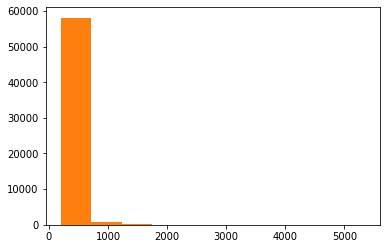

In [122]:
plt.hist(lengths_100_euclidean)


(array([84., 13.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([201. , 234.9, 268.8, 302.7, 336.6, 370.5, 404.4, 438.3, 472.2,
        506.1, 540. ]),
 <BarContainer object of 10 artists>)

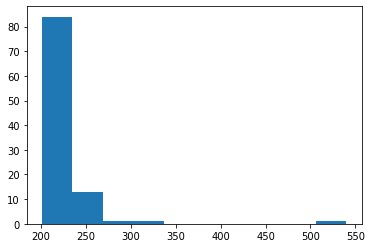

In [125]:
plt.hist(lengths_100_euclidean)

#### check tf-idf for cosine

In [126]:
model_tf_idf_cosine = NearestNeighbors(metric='cosine', algorithm='brute')
model_tf_idf_cosine.fit(tf_idf)

NearestNeighbors(algorithm='brute', metric='cosine')

In [131]:
distances, indices = model_tf_idf_cosine.kneighbors(tf_idf[35817], n_neighbors=100)

In [132]:
wiki.iloc[indices[0],1]

35817                         Barack Obama
24478                            Joe Biden
38376                       Samantha Power
57108               Hillary Rodham Clinton
38714              Eric Stern (politician)
                       ...                
43760                         Jody Freeman
28267                      Michael C. Dorf
48848    Greg Harris (Illinois politician)
686                     Jesse Jackson, Jr.
5020              Gary Peters (politician)
Name: name, Length: 100, dtype: object

In [135]:
lengths_100_euclidean = wiki.iloc[indices[0],2].apply(lambda x: len(x.split()))
lenght_all = wiki['text'].apply(lambda x: len(x.split()))

(array([42., 24.,  8., 17.,  6.,  2.,  0.,  0.,  0.,  1.]),
 array([202. , 271.1, 340.2, 409.3, 478.4, 547.5, 616.6, 685.7, 754.8,
        823.9, 893. ]),
 <BarContainer object of 10 artists>)

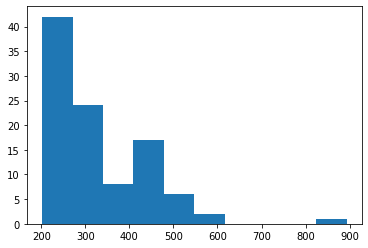

In [136]:
plt.hist(lengths_100_euclidean)